In [ ]:
import numpy as np
import re
import pickle
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download("stopwords") 
import pandas as pd
import neattext.functions as nfx
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/tweet_emotions.csv")

In [ ]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [ ]:
df["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

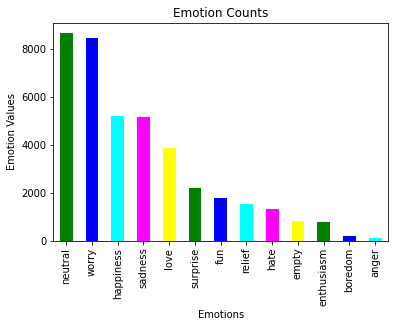

In [ ]:
df["sentiment"].value_counts().plot(kind="bar",title="Emotion Counts",ylabel="Emotion Values",xlabel="Emotions",
                                    color=[ 'green', 'blue', 'cyan',"magenta","yellow"]);


In [ ]:
from textblob import TextBlob

In [ ]:
def getsentiment(content):
    blob=TextBlob(content)
    sentiment= blob.sentiment.polarity
    if sentiment > 0:
        result="Positive"
    elif sentiment == 0 :
        result="Neutral"
    else:
        result= "Negative"
    return result

In [ ]:
getsentiment("weakly like")

'Negative'

In [ ]:
df["Results"] = df["content"].apply(getsentiment)

In [ ]:
df.sample(n=10)

,tweet_id,sentiment,content,Results
13351,1964005629,neutral,I'm in class right now 1 more week of school.,Positive
22409,1694420877,neutral,On the way to home,Neutral
20675,1694089960,empty,@prwebmobilenews Looking for a new SMS sending...,Positive
39279,1753790197,love,@CirkusMike tweetie is very good for multiple ...,Positive
38191,1753616330,happiness,"OMG i'm so happy as now,thanks to Micheal Shee...",Positive
25913,1695248697,neutral,On train with at least two gaggles of teenager...,Negative
34367,1752848122,neutral,Watching cartoons.....,Neutral
1272,1957261056,sadness,because my dad has the tv to loud. Then i get ...,Positive
37645,1753518658,happiness,&amp;&amp;the night continues! w/ my fav mazi...,Neutral
10161,1962837804,worry,@Kngston someone i work with today told me tha...,Neutral


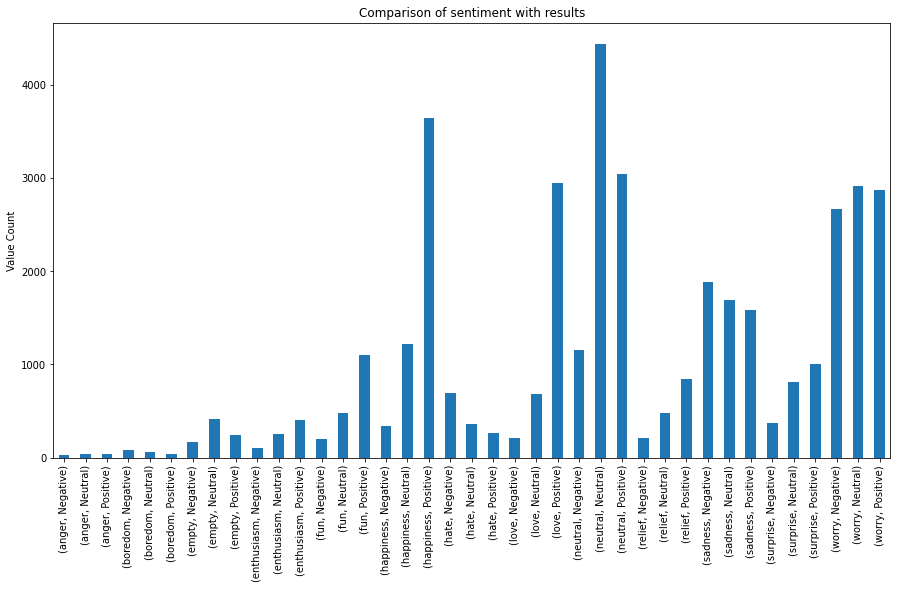

In [ ]:
df.groupby(["sentiment","Results"]).size().plot(kind="bar",figsize=(15,8),ylabel="Value Count",title="Comparison of sentiment with results",
                                               xlabel="");

In [ ]:
df["Clean_Content"]=df["content"].apply(nfx.remove_stopwords)

In [ ]:
df["Clean_Content"]=df["Clean_Content"].apply(nfx.remove_userhandles)

In [ ]:
df["Clean_Content"]=df["Clean_Content"].apply(nfx.remove_punctuations)

In [ ]:
df["Clean_Content"]=df["Clean_Content"].apply(nfx.remove_emails)

In [ ]:
df["Clean_Content"]=df["Clean_Content"].apply(nfx.remove_special_characters)

In [ ]:
df[["content","Clean_Content"]]

,content,Clean_Content
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


In [ ]:
from collections import Counter

In [ ]:
def getkeywords(text,num=50):
    tokens = [x for x in text.split()]
    common_tokens = Counter(tokens).most_common(num)
    return dict(common_tokens)

In [ ]:
sentiment_list=df["sentiment"].unique().tolist()

In [ ]:
sentiment_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [ ]:
sadness_list=df[df["sentiment"]=="sadness"]["Clean_Content"].tolist()

In [ ]:
sadness_docx=" ".join(sadness_list)

In [ ]:
keywords_sadness=getkeywords(sadness_docx)

In [ ]:
keywords_sadness

{'Im': 477,
 'day': 321,
 'sad': 319,
 'miss': 314,
 'work': 311,
 'im': 308,
 'like': 271,
 'today': 255,
 'cant': 245,
 'got': 208,
 'going': 192,
 'time': 167,
 'bad': 162,
 'good': 161,
 'feel': 159,
 'want': 158,
 'know': 157,
 'home': 147,
 '2': 138,
 'wish': 132,
 'sorry': 130,
 'u': 127,
 'it': 120,
 'amp': 118,
 'me': 110,
 'think': 107,
 'night': 106,
 'need': 103,
 'weekend': 103,
 'gonna': 101,
 'new': 100,
 'tomorrow': 99,
 'love': 97,
 'tonight': 97,
 'sick': 91,
 'you': 90,
 'tired': 89,
 'sleep': 85,
 'hate': 84,
 'now': 82,
 'lol': 82,
 'days': 82,
 'missed': 82,
 'sucks': 80,
 'week': 80,
 'people': 79,
 'dont': 76,
 'right': 76,
 'fun': 72,
 'oh': 72}

In [ ]:
def plot_most_common_words(mydict):
    df1=pd.DataFrame(mydict.items(),columns=["token","count"])
    plt.figure(figsize=(30,20))
    sns.barplot(x="token",y="count",data=df1)
    plt.xticks(rotation=45)
    plt.show()

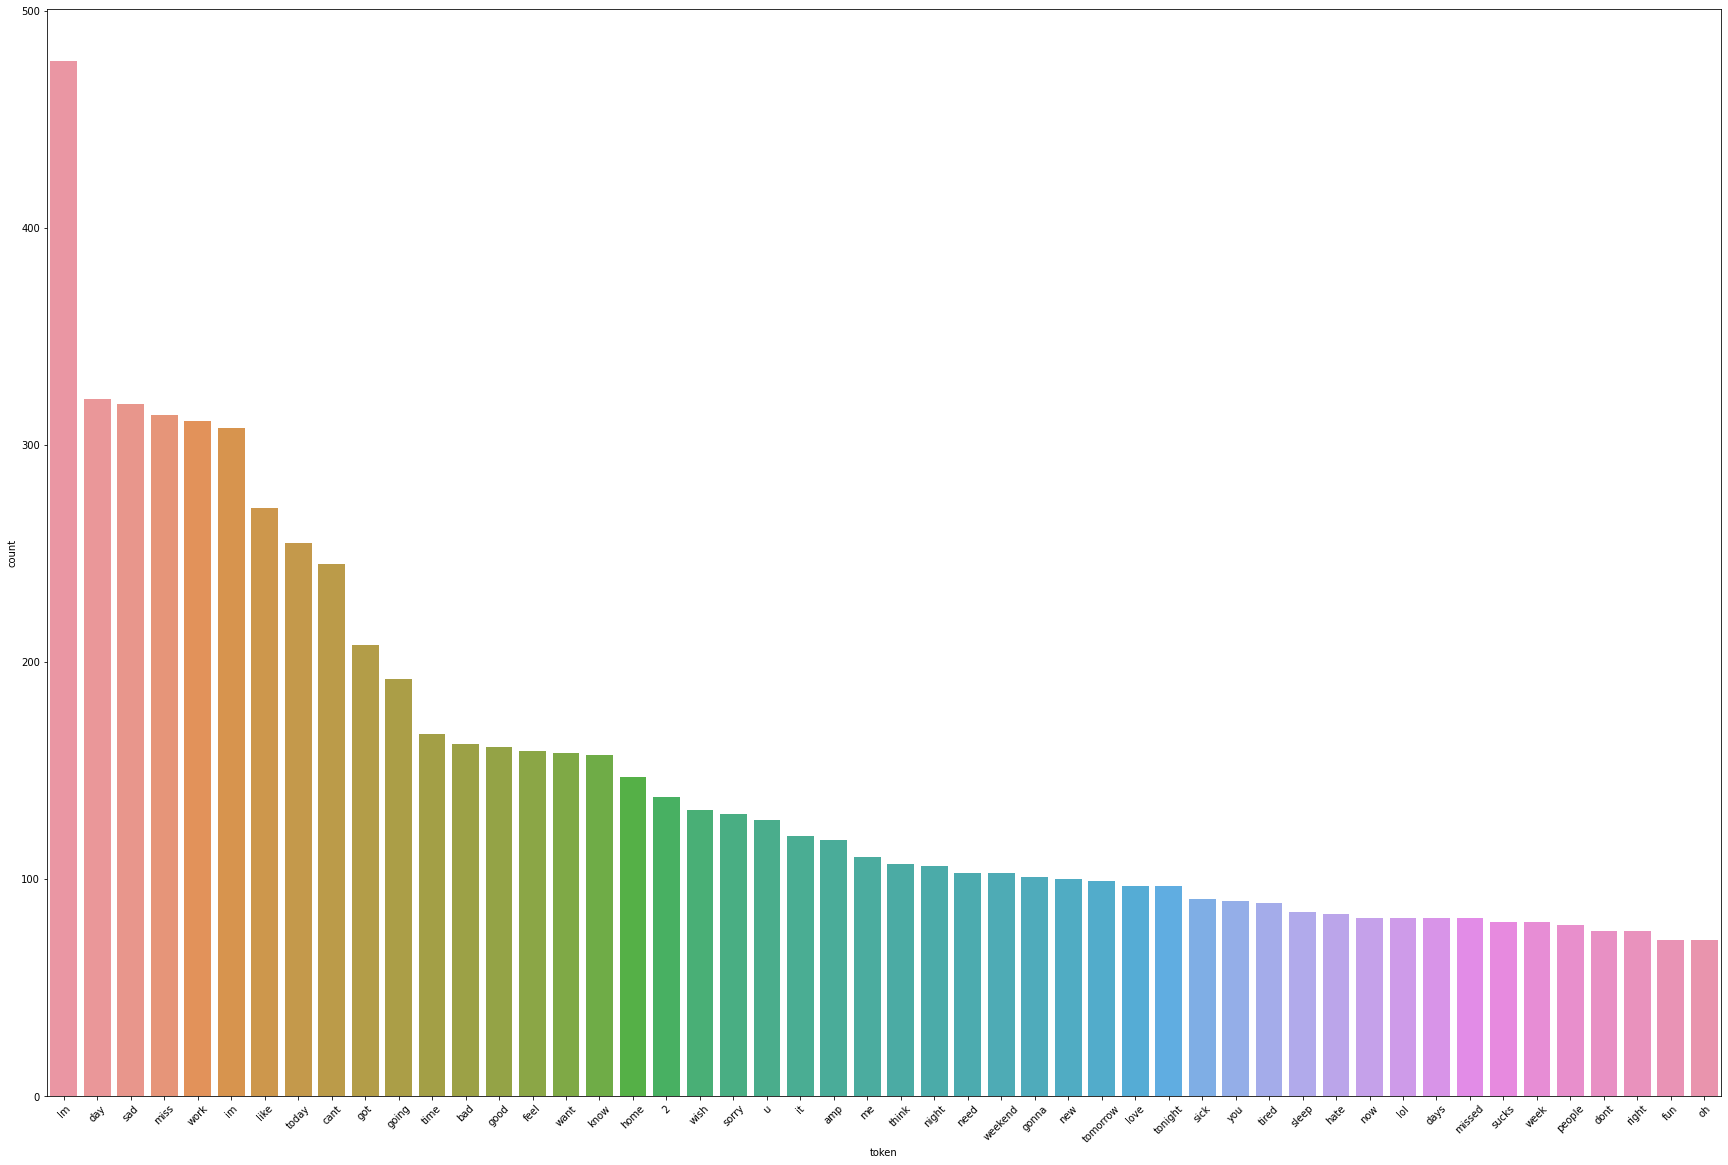

In [ ]:
plot_most_common_words(keywords_sadness)

In [ ]:
from wordcloud import WordCloud


In [ ]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(100,15))
    plt.imshow(mywordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show

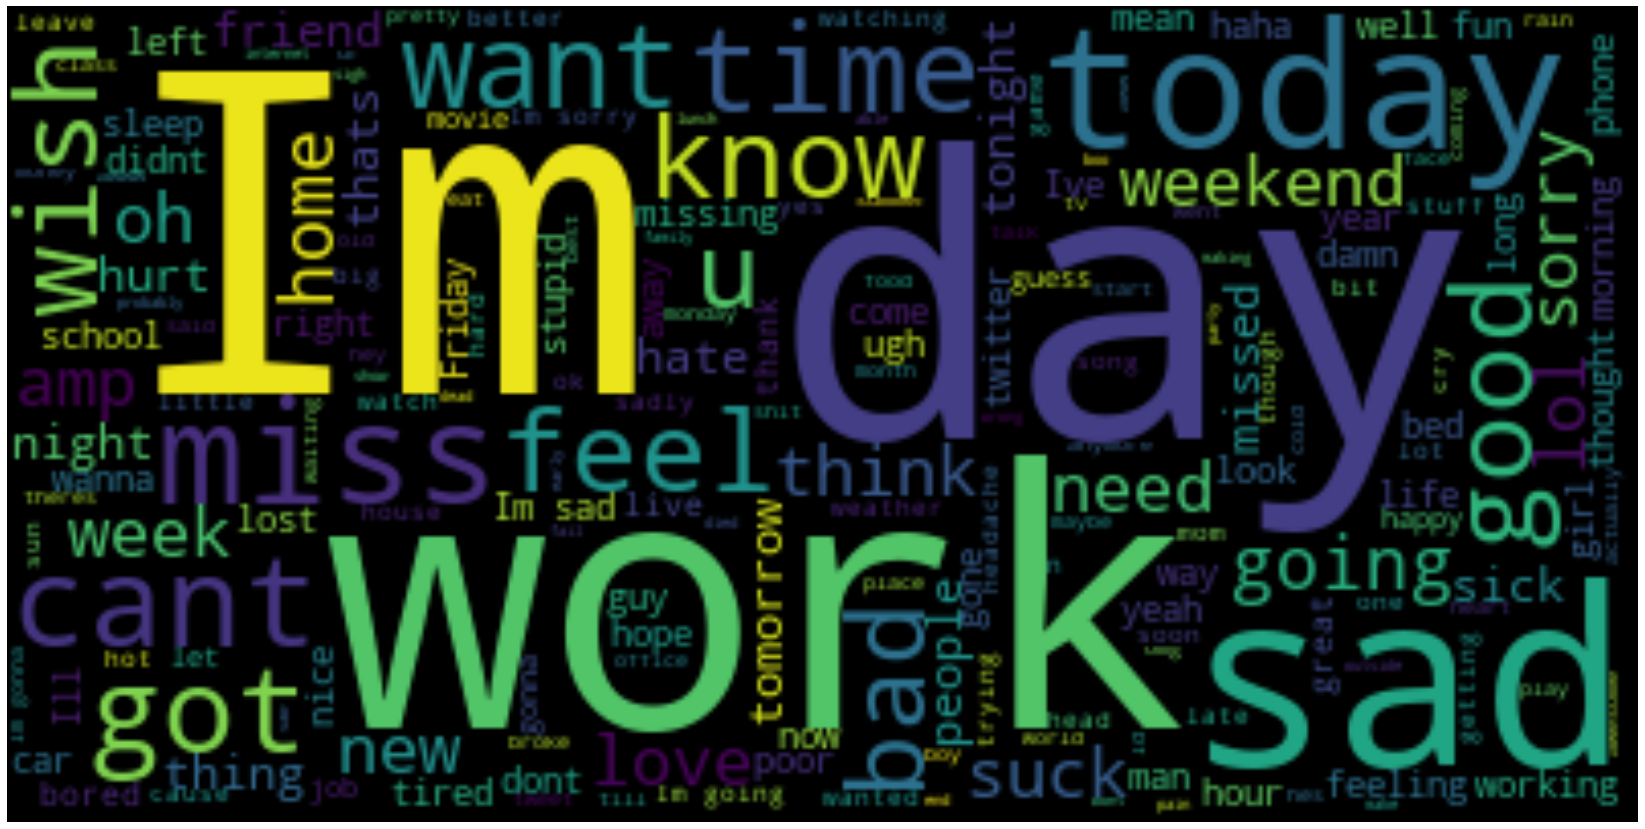

In [ ]:
plot_wordcloud(sadness_docx)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,tweet_id,sentiment,content,Results,Clean_Content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative,know listenin bad habit earlier started frea...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral,Layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral,want trade Houston tickets will


In [ ]:
vectorizer=CountVectorizer(max_features=2000,min_df=3,max_df=0.6,stop_words=stopwords.words("english"))

In [ ]:
X=vectorizer.fit_transform(df["Clean_Content"]).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
transformer = TfidfTransformer()

In [ ]:
X2 = transformer.fit_transform(X).toarray() 

In [ ]:
for label, content in df2.items():
    if pd.api.types.is_string_dtype(content):
        df2[label] = content.astype("category").cat.as_ordered()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tweet_id       40000 non-null  int64   
 1   sentiment      40000 non-null  category
 2   content        40000 non-null  category
 3   Results        40000 non-null  category
 4   Clean_Content  40000 non-null  category
dtypes: category(4), int64(1)
memory usage: 3.3 MB


In [ ]:
df2.sentiment.cat.codes

0         2
1        10
2        10
3         3
4         8
         ..
39995     8
39996     7
39997     7
39998     5
39999     7
Length: 40000, dtype: int8

In [ ]:
for label, content in df2.items():
    if not pd.api.types.is_numeric_dtype(content):
        df2[label] = pd.Categorical(content).codes     

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       40000 non-null  int64
 1   sentiment      40000 non-null  int8 
 2   content        40000 non-null  int32
 3   Results        40000 non-null  int8 
 4   Clean_Content  40000 non-null  int32
dtypes: int32(2), int64(1), int8(2)
memory usage: 703.2 KB


In [ ]:
y=df2["sentiment"]
len(y)

40000

In [ ]:
y

0         2
1        10
2        10
3         3
4         8
         ..
39995     8
39996     7
39997     7
39998     5
39999     7
Name: sentiment, Length: 40000, dtype: int8

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X2,y,test_size=0.2,random_state=42)

In [ ]:
clf=LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
clf.score(x_test,y_test)

0.341375